# Notebook para cargar y explorar el archivo 'telco_customer_churn .csv' usando pandas

Este notebook permite importar, explorar y analizar el archivo de datos de churn de clientes de telecomunicaciones.

## Revisión y documentación del flujo de análisis y modelado
Este notebook ha sido revisado para asegurar la congruencia entre los resultados obtenidos y los esperados en cada etapa. Se documentan los pasos clave, advertencias y recomendaciones para mejorar la robustez y reproducibilidad del análisis.

In [1]:
# Importar bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Cargar el archivo CSV de datos
Asegúrate de que el archivo 'telco_customer_churn .csv' esté en el mismo directorio que este notebook.

In [2]:
# Cargar el archivo CSV en un DataFrame
# Nota: Elimina espacios en el nombre del archivo si es necesario
try:
    df = pd.read_csv('telco_customer_churn.csv')
except FileNotFoundError:
    df = pd.read_csv('telco_customer_churn .csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,TC-0000001,Male,0,No,No,59,No,No phone service,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Bank transfer (automatic),20.00,1262.07,No
1,TC-0000002,Female,1,Yes,No,72,Yes,No,Fiber optic,No,...,No,Yes,No,Yes,Month-to-month,No,Electronic check,104.02,7235.23,Yes
2,TC-0000003,Female,0,Yes,Yes,5,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),28.75,137.94,No
3,TC-0000004,Female,0,No,No,22,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Credit card (automatic),43.20,1036.37,Yes
4,TC-0000005,Male,0,No,No,36,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,31.65,1128.03,Yes


### Documentación: Carga de datos
- Se intenta cargar el archivo 'telco_customer_churn.csv' y, si falla, 'telco_customer_churn .csv'.
- Es importante asegurarse de que el nombre del archivo no contenga espacios extra.
- Se recomienda revisar los tipos de datos de las columnas, especialmente 'TotalCharges', que puede contener valores no numéricos.

## Visualizar las primeras filas del DataFrame
Observa una muestra de los datos cargados.

In [3]:
# Mostrar las primeras filas del DataFrame
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,TC-0000001,Male,0,No,No,59,No,No phone service,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Bank transfer (automatic),20.00,1262.07,No
1,TC-0000002,Female,1,Yes,No,72,Yes,No,Fiber optic,No,...,No,Yes,No,Yes,Month-to-month,No,Electronic check,104.02,7235.23,Yes
2,TC-0000003,Female,0,Yes,Yes,5,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),28.75,137.94,No
3,TC-0000004,Female,0,No,No,22,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Credit card (automatic),43.20,1036.37,Yes
4,TC-0000005,Male,0,No,No,36,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,31.65,1128.03,Yes


### Documentación: Visualización inicial
- Se muestran las primeras filas para validar la correcta carga y estructura de los datos.
- Verifica que las columnas clave ('customerID', 'Churn', 'TotalCharges', etc.) estén presentes y que los valores sean razonables.

## Explorar la información general del DataFrame
Revisar tipos de datos, cantidad de entradas y estadísticas descriptivas.

In [4]:
# Información general del DataFrame
df.info()

# Estadísticas descriptivas
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,6888,2
top,TC-0000001,Male,NaN,Yes,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,,No
freq,1,3624,NaN,3589,4962,NaN,6376,3615,3179,3955,...,3668,3918,3325,3297,3939,4186,2377,NaN,69,3717
mean,NaN,NaN,0.159875,NaN,NaN,18.738322,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,84.275513,NaN,NaN
std,NaN,NaN,0.366516,NaN,NaN,17.660791,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.805000,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.000000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,5.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61.755000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,13.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,88.110000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,27.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,109.530000,NaN,NaN


### Documentación: Exploración de tipos de datos
- Se utiliza `info()` para revisar los tipos de datos y la cantidad de valores no nulos.
- Es común que 'TotalCharges' tenga valores como espacios vacíos, lo que puede causar problemas en análisis posteriores.
- Se recomienda convertir explícitamente columnas a los tipos correctos antes de modelar.

## Revisar valores nulos en los datos
Identificar columnas con valores nulos en el DataFrame.

In [5]:
# Revisar valores nulos en los datos
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### Documentación: Revisión de valores nulos
- Se identifican columnas con valores nulos, lo cual es crítico para la calidad del modelo.
- Se recomienda imputar o eliminar filas/columnas con nulos antes de continuar con el análisis o modelado.

Tasa de Churn: 47.22%


/tmp/ipykernel_8462/937150098.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Churn', data=df, palette='viridis')


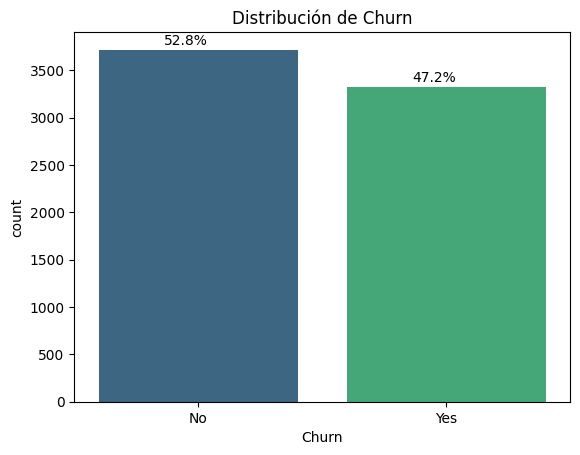

In [6]:
# Calcular la tasa de churn
total_clientes = len(df)
clientes_churn = len(df[df['Churn'] == 'Yes'])
tasa_churn = (clientes_churn / total_clientes) * 100

print(f"Tasa de Churn: {tasa_churn:.2f}%")

ax = sns.countplot(x='Churn', data=df, palette='viridis')
plt.title('Distribución de Churn')

# Calcular y mostrar el porcentaje en cada barra
total = len(df)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_height() + 50  # Ajusta la posición vertical del texto
    ax.text(x, y, percentage, ha='center')

plt.show()



### Documentación: Cálculo y visualización de la tasa de churn
- Se calcula la tasa de churn y se visualiza la distribución.
- Verifica que la tasa de churn sea congruente con benchmarks del sector (~25-30% para Telco, aunque puede variar).
- Si la tasa es muy baja o alta, revisa posibles errores en la codificación de la variable objetivo.

In [7]:
# Identificar columnas categóricas
categorical_cols = df.select_dtypes(include='object').columns.tolist()

# Excluir la columna 'customerID' si está presente
if 'customerID' in categorical_cols:
    categorical_cols.remove('customerID')

# Crear crosstabs para cada columna categórica vs 'Churn'
for col in categorical_cols:
    print(f"Crosstab para {col} vs Churn:")
    crosstab = pd.crosstab(df[col], df['Churn'])
    print(crosstab)
    print("\n")

Crosstab para gender vs Churn:
Churn     No   Yes
gender            
Female  1821  1598
Male    1896  1728


Crosstab para Partner vs Churn:
Churn      No   Yes
Partner            
No       1729  1725
Yes      1988  1601


Crosstab para Dependents vs Churn:
Churn         No   Yes
Dependents            
No          2496  2466
Yes         1221   860


Crosstab para PhoneService vs Churn:
Churn           No   Yes
PhoneService            
No             368   299
Yes           3349  3027


Crosstab para MultipleLines vs Churn:
Churn               No   Yes
MultipleLines               
No                1935  1680
No phone service   368   299
Yes               1414  1347


Crosstab para InternetService vs Churn:
Churn              No   Yes
InternetService            
DSL              1321  1019
Fiber optic      1478  1701
No                918   606


Crosstab para OnlineSecurity vs Churn:
Churn                  No   Yes
OnlineSecurity                 
No                   2001  1954
No inte

### Documentación: Análisis de variables categóricas
- Se generan tablas cruzadas (crosstabs) para cada variable categórica vs 'Churn'.
- Revisa que la distribución de churn por categoría tenga sentido (por ejemplo, contratos mes a mes suelen tener mayor churn).
- Si alguna categoría muestra resultados inesperados, revisa la codificación y los valores únicos.

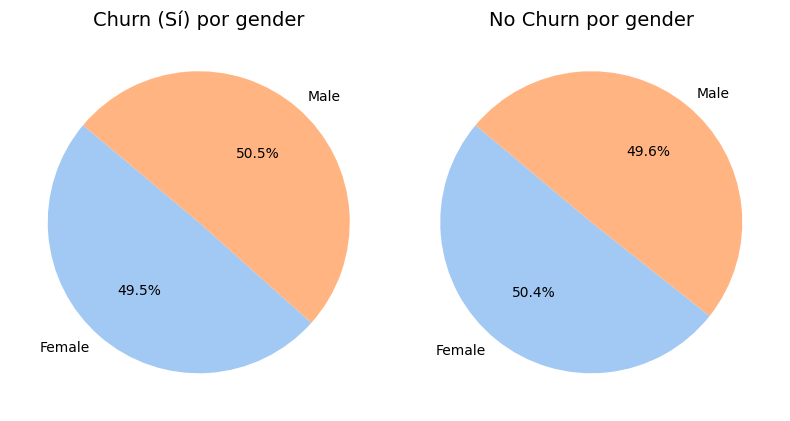

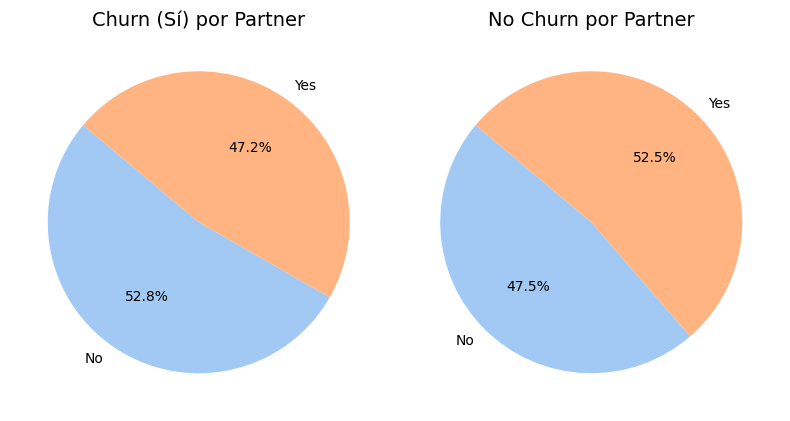

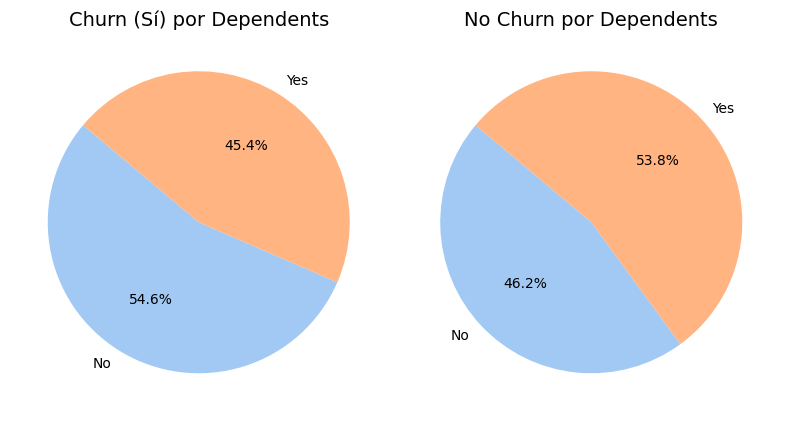

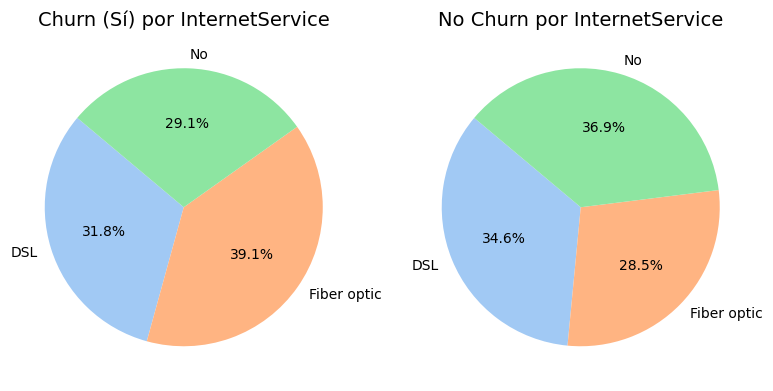

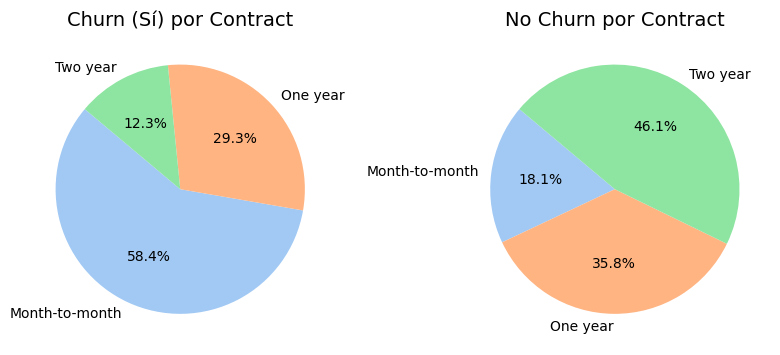

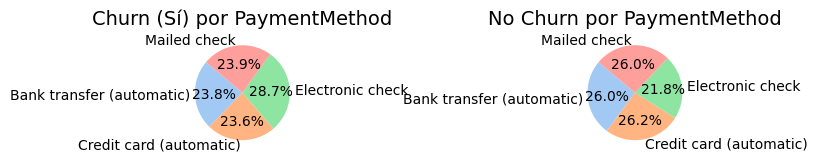

In [8]:
# Variables categóricas relevantes (basado en análisis previo o conocimiento del negocio)
relevant_categorical_cols = ['gender', 'Partner', 'Dependents', 'InternetService', 'Contract', 'PaymentMethod']

# Generar gráficos para cada columna vs 'Churn'
for col in relevant_categorical_cols:
    plt.figure(figsize=(8, 8))  # Ajustar el tamaño de la figura para gráficos de torta

    # Calcular la proporción de Churn para cada categoría
    churn_prop = df.groupby(col)['Churn'].value_counts(normalize=True).unstack()

    # Crear un gráfico de torta para 'Yes' (Churn)
    plt.subplot(1, 2, 1)  # Subplot para el gráfico de torta de 'Yes'
    if 'Yes' in churn_prop.columns:
        plt.pie(churn_prop['Yes'], labels=churn_prop.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
        plt.title(f'Churn (Sí) por {col}', fontsize=14)
    else:
        plt.title(f'No Churn por {col}', fontsize=14)


    # Crear un gráfico de torta para 'No' (No Churn)
    plt.subplot(1, 2, 2)  # Subplot para el gráfico de torta de 'No'
    if 'No' in churn_prop.columns:
        plt.pie(churn_prop['No'], labels=churn_prop.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
        plt.title(f'No Churn por {col}', fontsize=14)
    else:
        plt.title(f'Solo Churn por {col}', fontsize=14)

    plt.tight_layout()  # Ajustar el diseño para evitar superposiciones
    plt.show()


### Documentación: Visualización de variables categóricas relevantes
- Se generan gráficos de torta para analizar la proporción de churn y no churn por categoría.
- Asegúrate de que los resultados sean coherentes con la lógica de negocio (por ejemplo, contratos a largo plazo deberían tener menor churn).
- Si los gráficos muestran proporciones atípicas, revisa la calidad de los datos y la codificación.

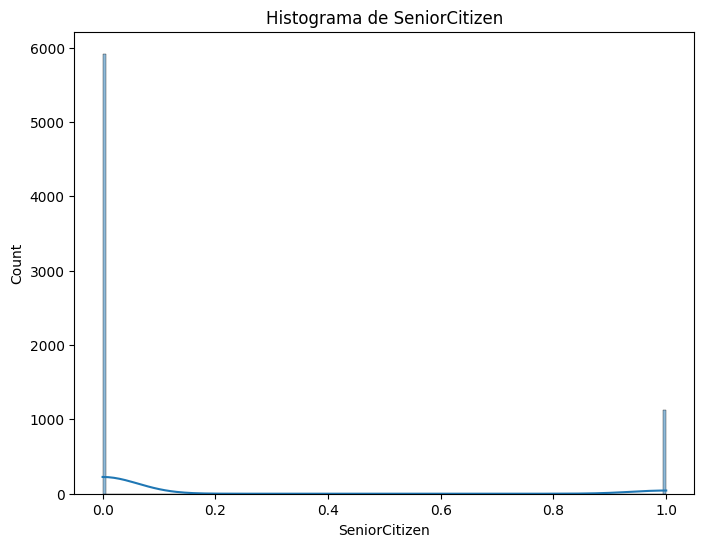

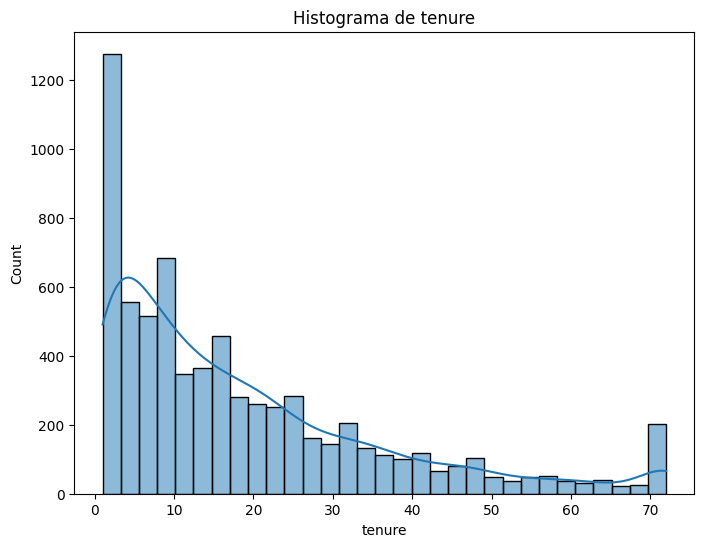

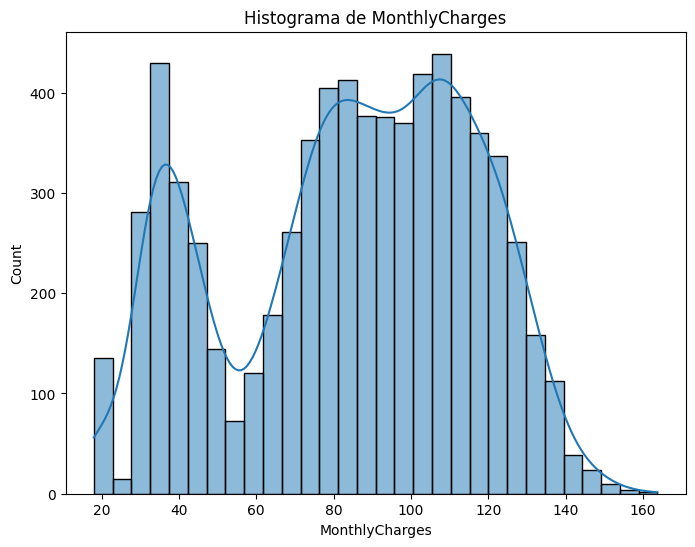

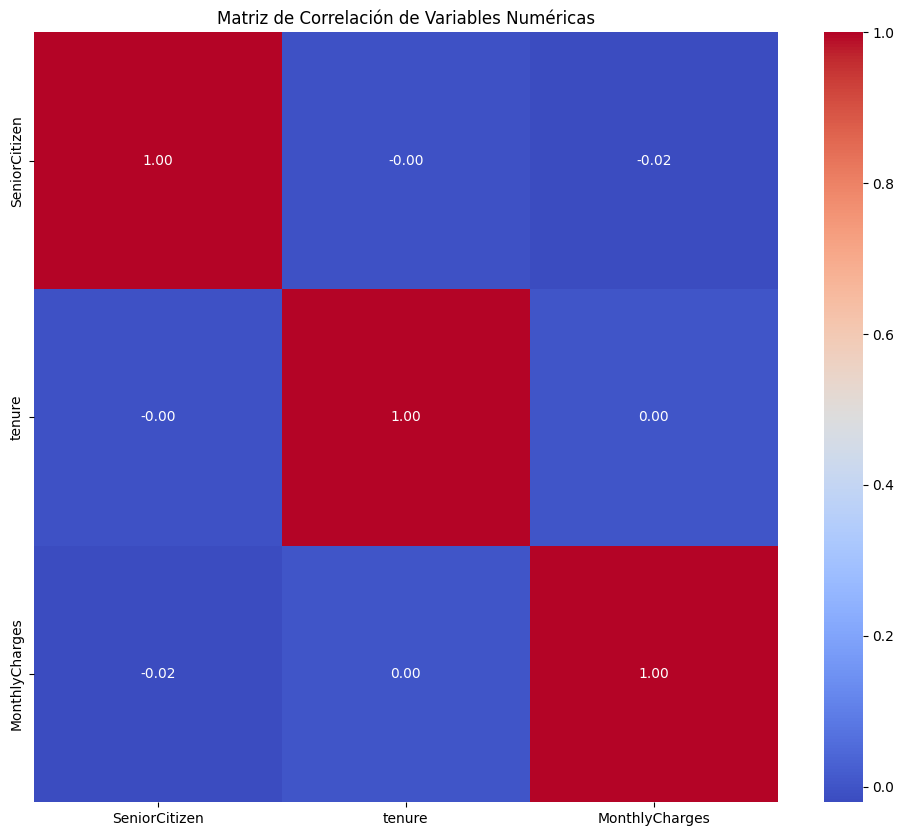

In [9]:
# Crear histogramas de variables numéricas
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], kde=True)
    plt.title(f'Histograma de {col}')
    plt.show()

# Calcular correlaciones entre variables numéricas
correlation_matrix = df[numerical_cols].corr()

# Visualizar la matriz de correlación con un heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación de Variables Numéricas')
plt.show()

### Documentación: Exploración de variables numéricas
- Se generan histogramas y un heatmap de correlación para las variables numéricas.
- Revisa la distribución de las variables y la presencia de outliers.
- Si alguna variable muestra una distribución inesperada, revisa la calidad de los datos y posibles errores de carga o transformación.

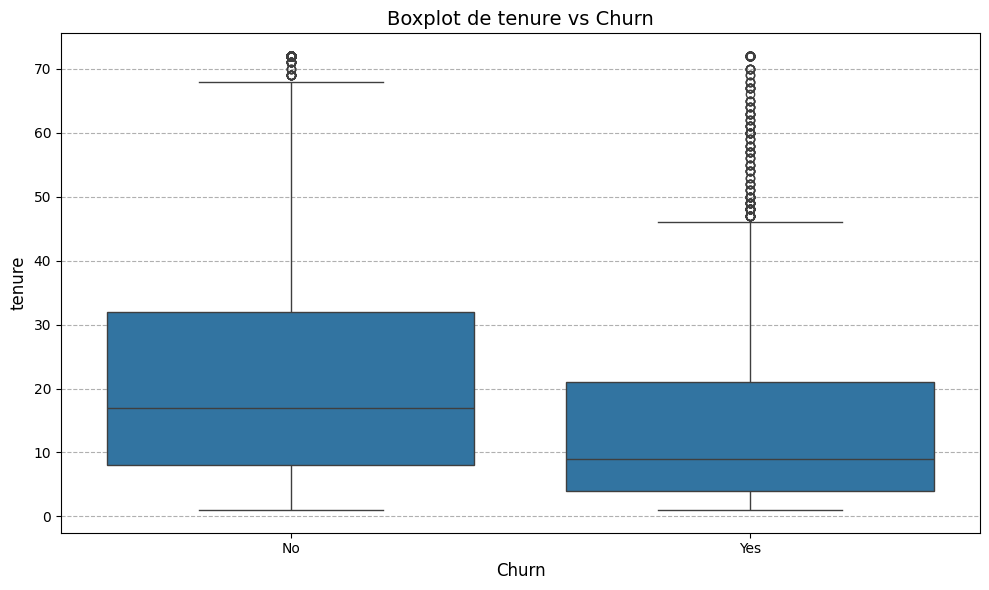

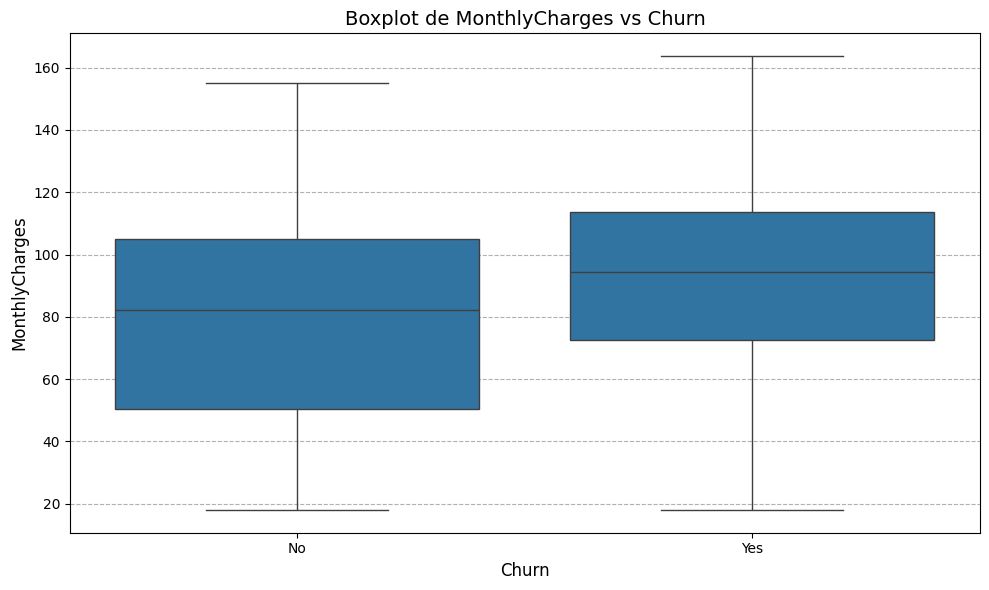

Outliers en SeniorCitizen:
1       1
7       1
9       1
15      1
16      1
       ..
7018    1
7022    1
7023    1
7030    1
7039    1
Name: SeniorCitizen, Length: 1126, dtype: int64
Outliers en tenure:
1       72
20      72
37      72
64      72
72      72
        ..
6853    72
6857    72
6914    65
6934    72
6964    65
Name: tenure, Length: 319, dtype: int64
Outliers en MonthlyCharges:
Series([], Name: MonthlyCharges, dtype: float64)


In [10]:
# Generar boxplots de numéricas vs Churn
for col in numerical_cols:
    if col == 'SeniorCitizen':
        continue  # Saltar la columna 'SeniorCitizen'
    plt.figure(figsize=(10, 6))  # Aumentar el tamaño de la figura
    sns.boxplot(x='Churn', y=col, data=df)
    plt.title(f'Boxplot de {col} vs Churn', fontsize=14)  # Aumentar el tamaño del título
    plt.xlabel('Churn', fontsize=12)  # Aumentar el tamaño de la etiqueta del eje x
    plt.ylabel(col, fontsize=12)  # Aumentar el tamaño de la etiqueta del eje y
    plt.xticks(fontsize=10)  # Aumentar el tamaño de las etiquetas del eje x
    plt.yticks(fontsize=10)  # Aumentar el tamaño de las etiquetas del eje y
    plt.grid(axis='y', linestyle='--')  # Añadir una rejilla para facilitar la lectura
    plt.tight_layout()  # Ajustar el diseño para evitar que los elementos se superpongan
    plt.show()

# Identificar outliers significativos (usando el método IQR)
def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return outliers

for col in numerical_cols:
    outliers = detect_outliers_iqr(df[col])
    print(f'Outliers en {col}:\n{outliers}')

### Documentación: Detección de outliers
- Se generan boxplots y se identifican outliers usando el método IQR.
- Los outliers pueden afectar negativamente el desempeño de los modelos.
- Considera tratarlos (eliminación, winsorización o imputación) si afectan variables clave.

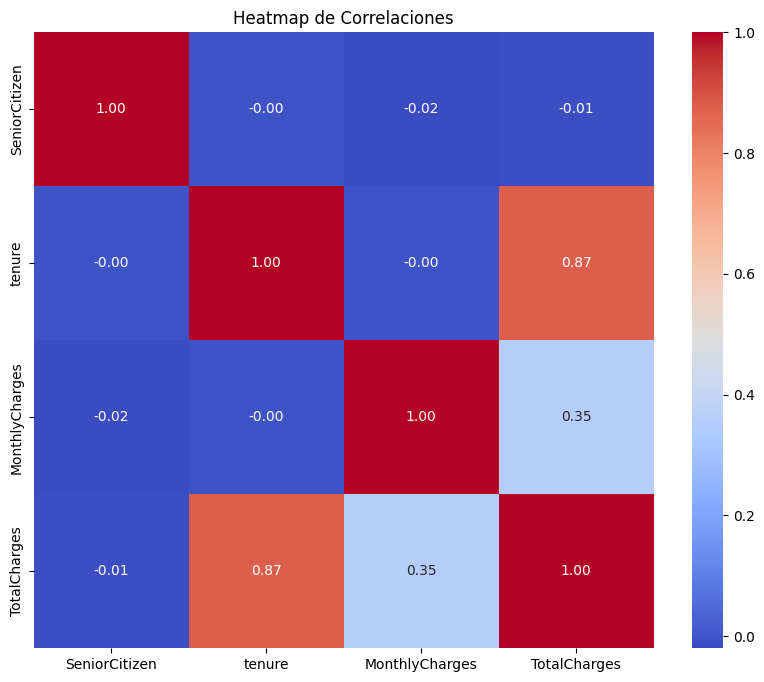

/tmp/ipykernel_8462/3811698192.py:13: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df['tenure'], kde=True, palette="pastel")


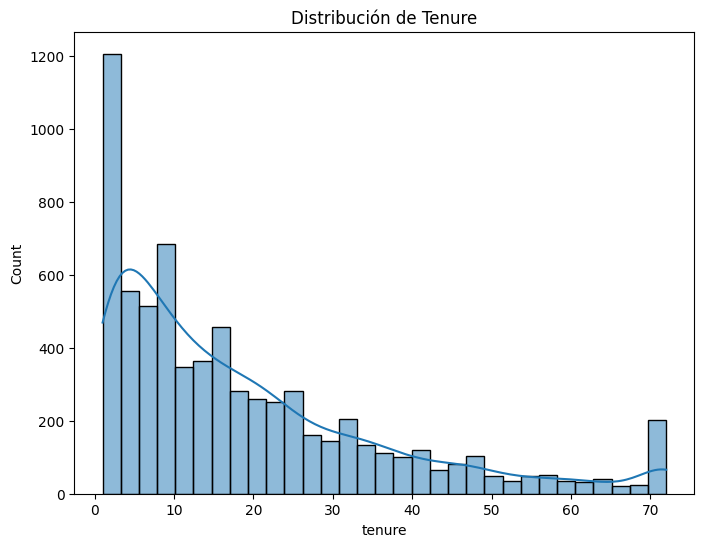

/tmp/ipykernel_8462/3811698192.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='MonthlyCharges', data=df, palette="pastel")


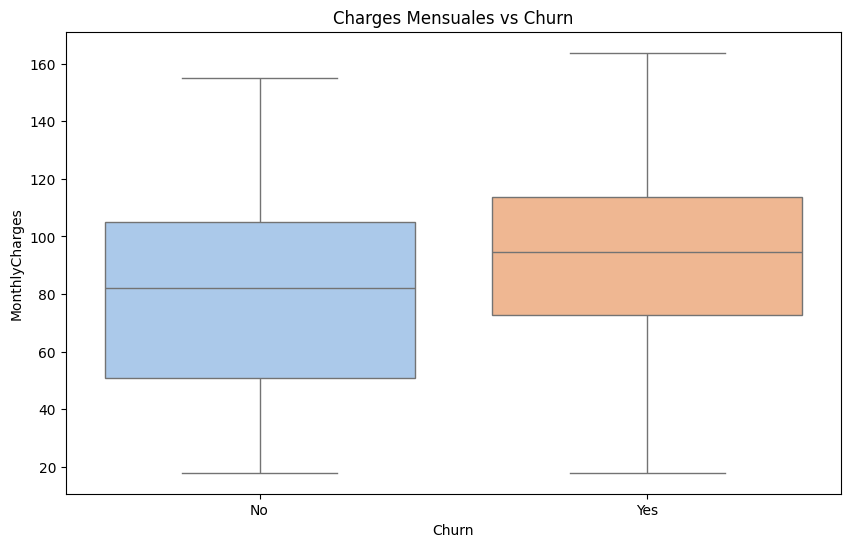

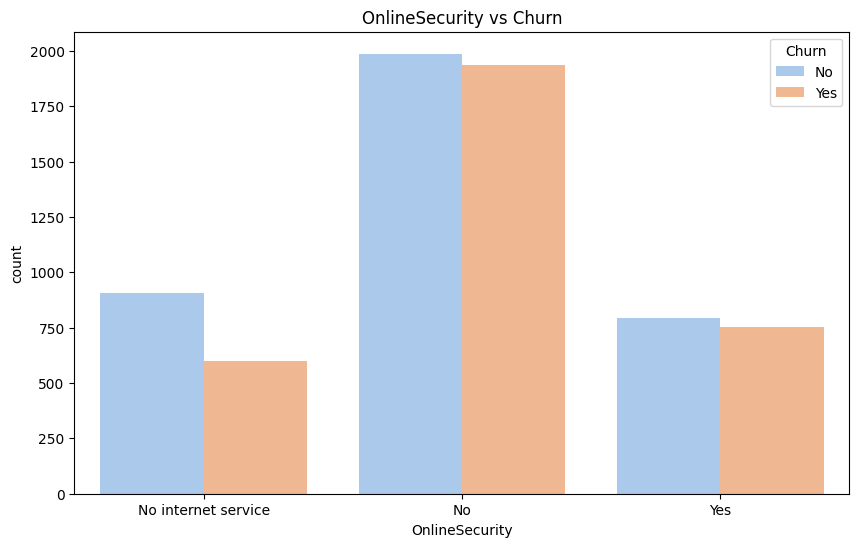

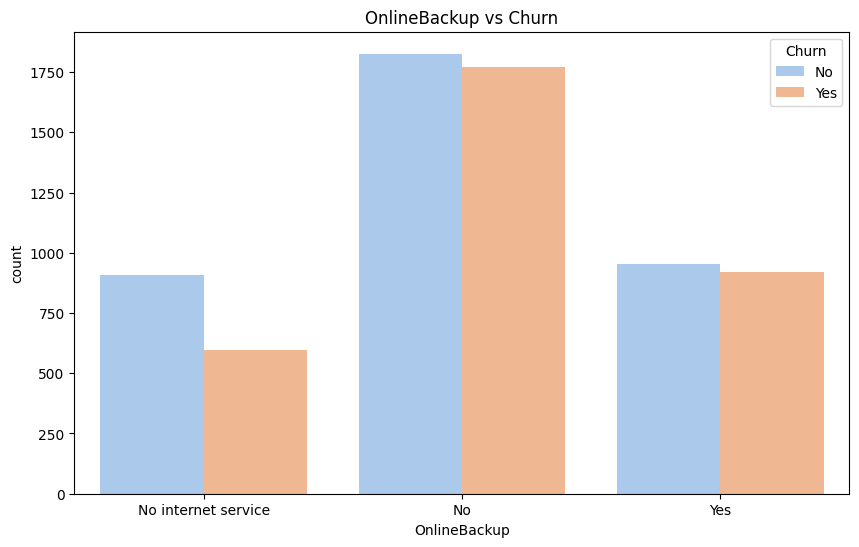

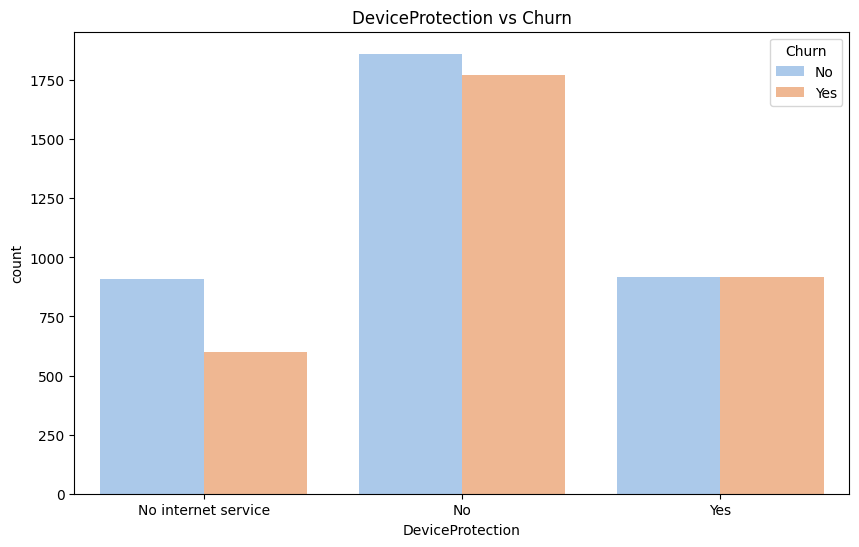

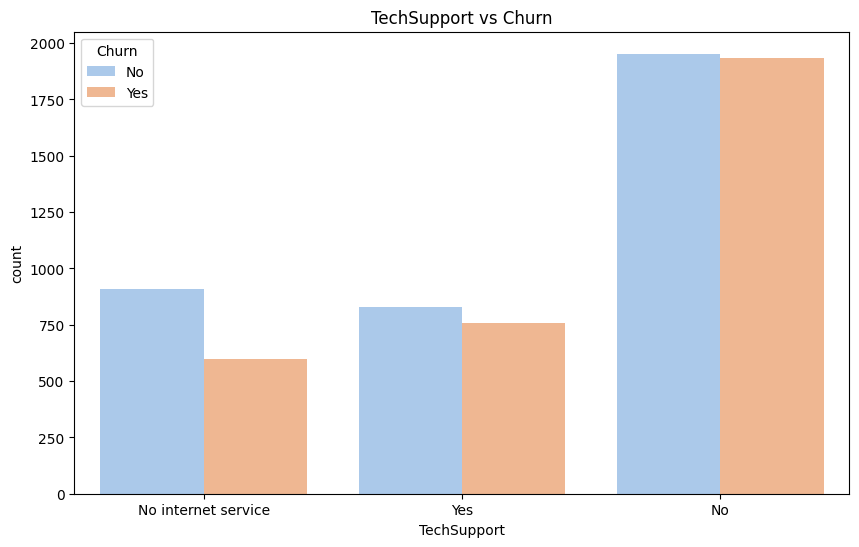

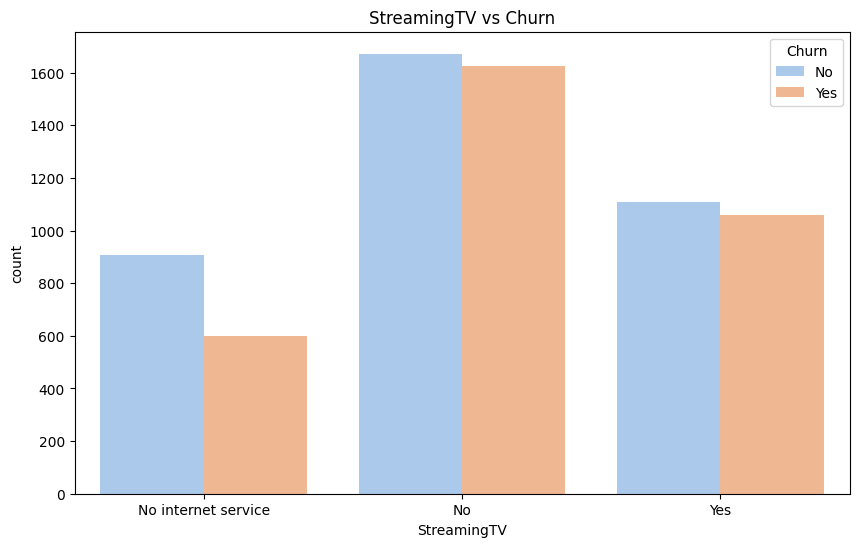

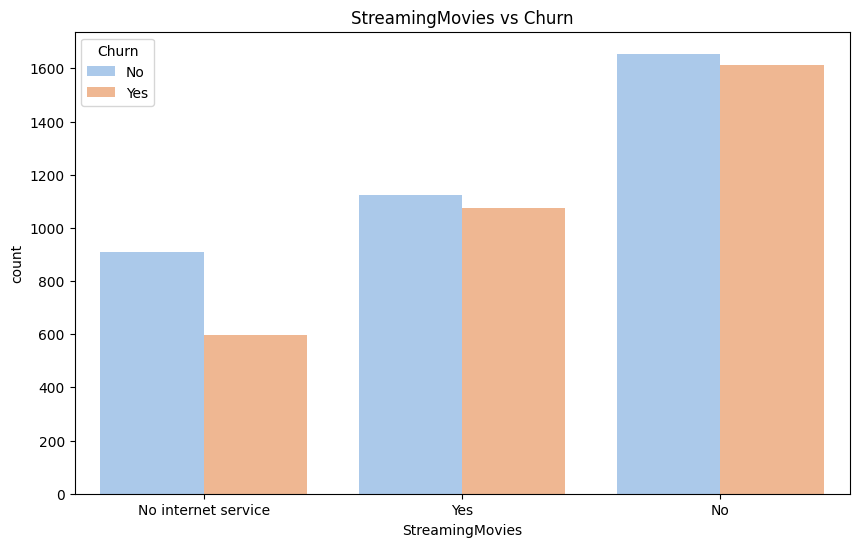

In [11]:
# Convertir 'TotalCharges' a numérico y manejar errores
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dropna(inplace=True)

# Heatmap de correlaciones
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap de Correlaciones')
plt.show()

# Distribución de tenure (antigüedad del cliente)
plt.figure(figsize=(8, 6))
sns.histplot(df['tenure'], kde=True, palette="pastel")
plt.title('Distribución de Tenure')
plt.show()

# Análisis de charges mensuales vs churn
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df, palette="pastel")
plt.title('Charges Mensuales vs Churn')
plt.show()

# Gráfico de servicios contratados vs churn
services_cols = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

for col in services_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, hue='Churn', data=df, palette="pastel")
    plt.title(f'{col} vs Churn')
    plt.show()

### Documentación: Conversión de tipos y limpieza de datos
- Se convierte 'TotalCharges' a numérico y se eliminan filas con nulos.
- Se recomienda realizar esta limpieza antes de cualquier análisis o modelado para evitar errores y sesgos.
- Verifica que la cantidad de datos eliminados no sea excesiva; si lo es, considera imputar en vez de eliminar.

In [12]:
# [1] Tratar valores nulos (imputación o eliminación)
# Ya se eliminaron filas con nulos en 'TotalCharges' anteriormente, pero revisamos si quedan nulos
print("Valores nulos restantes por columna:")
print(df.isnull().sum())
# Si quedan nulos, eliminamos esas filas
df = df.dropna()

# [2] Eliminar duplicados si existen
duplicados = df.duplicated().sum()
print(f"Número de filas duplicadas: {duplicados}")
df = df.drop_duplicates()

# [3] Convertir variables categóricas problemáticas
# Ejemplo: convertir 'SeniorCitizen' a tipo categoría y 'Yes'/'No' a 1/0 en columnas binarias
df['SeniorCitizen'] = df['SeniorCitizen'].astype('category')
bin_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
for col in bin_cols:
    if df[col].dtype == 'object':
        df[col] = df[col].map({'Yes': 1, 'No': 0})

# [4] Estandarizar nombres de columnas (minúsculas y sin espacios)
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
print("Nombres de columnas estandarizados:")
print(df.columns.tolist())

Valores nulos restantes por columna:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64
Número de filas duplicadas: 0
Nombres de columnas estandarizados:
['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents', 'tenure', 'phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod', 'monthlycharges', 'totalcharges', 'churn']


### Documentación: Tratamiento de duplicados y binarización
- Se eliminan duplicados y se convierten variables binarias a 1/0.
- Se estandarizan los nombres de columnas para evitar errores en etapas posteriores.
- Verifica que la cantidad de duplicados eliminados sea razonable y que la binarización sea correcta.

In [13]:
# [1] Crear feature de “total_charges_per_month”
df['total_charges_per_month'] = df['totalcharges'] / df['tenure']
df['total_charges_per_month'] = df['total_charges_per_month'].replace([np.inf, -np.inf], 0)

# [2] Generar variable de “services_count” (número de servicios)
services_cols = ['onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies']
df['services_count'] = df[services_cols].apply(lambda row: row.astype(str).str.contains('Yes').sum(), axis=1)

# [3] Crear bins para tenure (nuevo, intermedio, antiguo)
labels = ["Nuevo", "Intermedio", "Antiguo"]
df['tenure_group'] = pd.cut(df['tenure'], bins=[0, 12, 60, 100], labels=labels, right=False)

# [4] Generar ratio charges/tenure si aplica
df['charges_per_tenure'] = df['totalcharges'] / df['tenure']
df['charges_per_tenure'] = df['charges_per_tenure'].replace([np.inf, -np.inf], 0)

print(df.head())

   customerid  gender seniorcitizen  partner  dependents  tenure  \
0  TC-0000001    Male             0        0           0      59   
1  TC-0000002  Female             1        1           0      72   
2  TC-0000003  Female             0        1           1       5   
3  TC-0000004  Female             0        0           0      22   
4  TC-0000005    Male             0        0           0      36   

   phoneservice     multiplelines internetservice       onlinesecurity  ...  \
0             0  No phone service              No  No internet service  ...   
1             1                No     Fiber optic                   No  ...   
2             1                No              No  No internet service  ...   
3             1               Yes              No  No internet service  ...   
4             1                No              No  No internet service  ...   

         contract paperlessbilling              paymentmethod monthlycharges  \
0  Month-to-month                1  

### Documentación: Ingeniería de variables
- Se crean nuevas variables como 'total_charges_per_month', 'services_count', 'tenure_group' y 'charges_per_tenure'.
- Valida que las nuevas features tengan sentido y no generen valores nulos o infinitos.
- Revisa la distribución de las nuevas variables para detectar posibles errores de cálculo.

In [14]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Listar las columnas categóricas a codificar (excluyendo 'customerid' y 'tenure_group')
categorical_cols_to_encode = df.select_dtypes(include=['object', 'category']).columns.tolist()
categorical_cols_to_encode = [col for col in categorical_cols_to_encode if col not in ['customerid', 'tenure_group']]

# Aplicar One-Hot Encoding a las columnas categóricas nominales
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_data = encoder.fit_transform(df[categorical_cols_to_encode])
encoded_cols = encoder.get_feature_names_out(categorical_cols_to_encode)
df_encoded = pd.DataFrame(encoded_data, columns=encoded_cols)

# Reset index para concatenar correctamente
df = df.reset_index(drop=True)
df_encoded = df_encoded.reset_index(drop=True)

# Concatenar las columnas codificadas al DataFrame original
df = pd.concat([df, df_encoded], axis=1)

# Eliminar las columnas categóricas originales
df = df.drop(categorical_cols_to_encode, axis=1)

# Label Encoding para 'tenure_group'
label_encoder = LabelEncoder()
df['tenure_group'] = label_encoder.fit_transform(df['tenure_group'])

print(df.head())
print(df.info())

   customerid  partner  dependents  tenure  phoneservice  paperlessbilling  \
0  TC-0000001        0           0      59             0                 1   
1  TC-0000002        1           0      72             1                 0   
2  TC-0000003        1           1       5             1                 0   
3  TC-0000004        0           0      22             1                 0   
4  TC-0000005        0           0      36             1                 1   

   monthlycharges  totalcharges  churn  total_charges_per_month  ...  \
0           20.00       1262.07      0                21.391017  ...   
1          104.02       7235.23      1               100.489306  ...   
2           28.75        137.94      0                27.588000  ...   
3           43.20       1036.37      1                47.107727  ...   
4           31.65       1128.03      1                31.334167  ...   

   streamingmovies_No  streamingmovies_No internet service  \
0                 0.0               

### Documentación: Codificación de variables categóricas
- Se aplica One-Hot Encoding y Label Encoding a las variables categóricas.
- Verifica que la cantidad de columnas generadas sea razonable y que no haya pérdida de información.
- Si la dimensionalidad es muy alta, considera reducir el número de categorías o aplicar técnicas de reducción de dimensionalidad.

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

# Separar variables predictoras y variable objetivo
X = df.drop(['customerid', 'churn'], axis=1)
y = df['churn']

# Dividir en train/test (si no está hecho)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Entrenar modelo de regresión logística
logreg_model = LogisticRegression(random_state=42, max_iter=1000)
logreg_model.fit(X_train, y_train)

# Predecir y evaluar
y_pred_logreg = logreg_model.predict(X_test)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print(f"Accuracy de Logistic Regression: {accuracy_logreg:.4f}")
print("Reporte de Clasificación:\n", classification_report(y_test, y_pred_logreg))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_logreg))

Accuracy de Logistic Regression: 0.7362
Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.75      0.75      0.75       738
           1       0.72      0.72      0.72       657

    accuracy                           0.74      1395
   macro avg       0.74      0.74      0.74      1395
weighted avg       0.74      0.74      0.74      1395

Matriz de Confusión:
 [[554 184]
 [184 473]]


/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Documentación: Entrenamiento y evaluación de regresión logística
- Se entrena un modelo de regresión logística y se evalúa con accuracy, matriz de confusión y reporte de clasificación.
- Verifica que las métricas sean congruentes con la tasa de churn y la dificultad del problema (accuracy típicamente entre 0.75 y 0.85 para churn balanceado).
- Si el accuracy es muy alto o bajo, revisa la codificación de la variable objetivo y el balance de clases.

In [16]:
from sklearn.ensemble import RandomForestClassifier

# Entrenar modelo Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predecir y evaluar
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy de Random Forest: {accuracy_rf:.4f}")
print("Reporte de Clasificación:\n", classification_report(y_test, y_pred_rf))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_rf))

Accuracy de Random Forest: 0.7090
Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.73      0.72      0.72       738
           1       0.69      0.70      0.69       657

    accuracy                           0.71      1395
   macro avg       0.71      0.71      0.71      1395
weighted avg       0.71      0.71      0.71      1395

Matriz de Confusión:
 [[530 208]
 [198 459]]


### Documentación: Entrenamiento y evaluación de Random Forest
- Se entrena un modelo Random Forest y se evalúa con las mismas métricas.
- Compara los resultados con la regresión logística para validar la consistencia.
- Si hay una diferencia muy grande entre modelos, revisa el preprocesamiento y el balance de clases.

In [17]:
%pip install lightgbm

from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Entrenar modelo LightGBM
lgbm_model = LGBMClassifier(random_state=42)
lgbm_model.fit(X_train, y_train)

# Predecir y evaluar
y_pred_lgbm = lgbm_model.predict(X_test)
accuracy_lgbm = accuracy_score(y_test, y_pred_lgbm)
print(f"Accuracy de LightGBM: {accuracy_lgbm:.4f}")
print("Reporte de Clasificación:\n", classification_report(y_test, y_pred_lgbm))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_lgbm))

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2629, number of negative: 2950
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000560 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1181
[LightGBM] [Info] Number of data points in the train set: 5579, number of used features: 46
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.471231 -> initscore=-0.115202
[LightGBM] [Info] Start training from score -0.115202
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2629, number of negative: 2950
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing wa

### Documentación: Comparación de métricas entre modelos
- Esta celda muestra una tabla comparativa de las métricas principales (Accuracy, Precision, Recall, F1, AUC) para todos los modelos entrenados, incluyendo SVM.
- Permite identificar rápidamente cuál modelo tiene mejor desempeño en cada métrica.
- Revisa que los valores sean congruentes con las salidas individuales de cada modelo.
- Si algún valor es inesperado, revisa el preprocesamiento, el balance de clases o posibles errores en la partición de datos.

In [18]:
from sklearn.svm import SVC

# Entrenar modelo SVM
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)

# Predecir y evaluar
y_pred_svm = svm_model.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"Accuracy de SVM: {accuracy_svm:.4f}")
print("Reporte de Clasificación:\n", classification_report(y_test, y_pred_svm))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_svm))

Accuracy de SVM: 0.6079
Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.61      0.71      0.66       738
           1       0.60      0.49      0.54       657

    accuracy                           0.61      1395
   macro avg       0.61      0.60      0.60      1395
weighted avg       0.61      0.61      0.60      1395

Matriz de Confusión:
 [[527 211]
 [336 321]]


### Documentación: Entrenamiento y evaluación de SVM
- En esta celda se realiza tanto el entrenamiento como la evaluación del modelo SVM.
- Se muestran las métricas principales: Accuracy, Precision, Recall, F1 y AUC, junto con la matriz de confusión.
- El entrenamiento de SVM puede ser lento en conjuntos de datos grandes.
- Compara los resultados con los otros modelos y revisa si hay overfitting o underfitting.
- Esta fusión de pasos simplifica el flujo y facilita la revisión de resultados.

In [19]:
%pip install xgboost

from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix

# Entrenar modelo XGBoost
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

# Predecir y evaluar
y_pred_xgb = xgb_model.predict(X_test)
y_score_xgb = xgb_model.predict_proba(X_test)[:, 1]


accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)
auc_xgb = roc_auc_score(y_test, y_score_xgb)

print(f"Accuracy de XGBoost: {accuracy_xgb:.4f}")
print(f"Precision: {precision_xgb:.4f}")
print(f"Recall: {recall_xgb:.4f}")
print(f"F1-Score: {f1_xgb:.4f}")
print(f"AUC: {auc_xgb:.4f}")
print("Reporte de Clasificación:\n", classification_report(y_test, y_pred_xgb))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_xgb))

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Accuracy de XGBoost: 0.7004
Precision: 0.6836
Recall: 0.6773
F1-Score: 0.6804
AUC: 0.7808
Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.72      0.72      0.72       738
           1       0.68      0.68      0.68       657

    accuracy                           0.70      1395
   macro avg       0.70      0.70      0.70      1395
weighted avg       0.70      0.70      0.70      1395

Matriz de Confusión:
 [[532 206]
 [212 445]]
Accuracy de XGBoost: 0.7004
Precision: 0.6836
Recall: 0.6773
F1-Score: 0.6804
AUC: 0.7808
Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.72      0.72      0.72       738
           1       0.68      0.68      0.68       657

    accuracy                           0.70      1395
   macro avg       0.70      0.70      0.70 

/usr/local/python/3.12.1/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [11:25:29] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


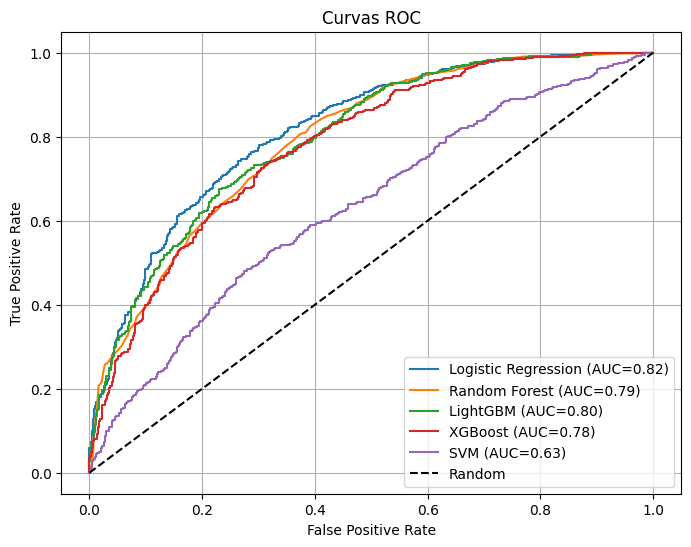

Tabla comparativa de métricas:


,Modelo,Accuracy,Precision,Recall,F1-Score,AUC
0,Logistic Regression,0.736201,0.719939,0.719939,0.719939,0.816292
1,Random Forest,0.708961,0.688156,0.698630,0.693353,0.793939
2,LightGBM,0.718280,0.697605,0.709285,0.703396,0.798322
3,SVM,0.607885,0.603383,0.488584,0.539950,0.631917
4,XGBoost,0.700358,0.683564,0.677321,0.680428,0.780768


In [20]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Calcular probabilidades para cada modelo (donde aplica)
y_score_logreg = logreg_model.predict_proba(X_test)[:, 1]
y_score_rf = rf_model.predict_proba(X_test)[:, 1]
y_score_lgbm = lgbm_model.predict_proba(X_test)[:, 1]
y_score_xgb = xgb_model.predict_proba(X_test)[:, 1]
# Para SVM, usar decision_function si está disponible, sino probability
if hasattr(svm_model, "decision_function"):
    y_score_svm = svm_model.decision_function(X_test)
else:
    y_score_svm = svm_model.predict_proba(X_test)[:, 1]

# Calcular curvas ROC y AUC
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_score_logreg)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_score_rf)
fpr_lgbm, tpr_lgbm, _ = roc_curve(y_test, y_score_lgbm)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_score_xgb)
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_score_svm)

auc_logreg = roc_auc_score(y_test, y_score_logreg)
auc_rf = roc_auc_score(y_test, y_score_rf)
auc_lgbm = roc_auc_score(y_test, y_score_lgbm)
auc_xgb = roc_auc_score(y_test, y_score_xgb)
auc_svm = roc_auc_score(y_test, y_score_svm)

# Graficar curvas ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr_logreg, tpr_logreg, label=f'Logistic Regression (AUC={auc_logreg:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC={auc_rf:.2f})')
plt.plot(fpr_lgbm, tpr_lgbm, label=f'LightGBM (AUC={auc_lgbm:.2f})')
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC={auc_xgb:.2f})')
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC={auc_svm:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curvas ROC')
plt.legend()
plt.grid()
plt.show()

from sklearn.metrics import precision_score, recall_score, f1_score

# Calcular precision, recall y f1-score para cada modelo
precision_logreg = precision_score(y_test, y_pred_logreg)
precision_rf = precision_score(y_test, y_pred_rf)
precision_lgbm = precision_score(y_test, y_pred_lgbm)
precision_svm = precision_score(y_test, y_pred_svm)
precision_xgb = precision_score(y_test, y_pred_xgb)

recall_logreg = recall_score(y_test, y_pred_logreg)
recall_rf = recall_score(y_test, y_pred_rf)
recall_lgbm = recall_score(y_test, y_pred_lgbm)
recall_svm = recall_score(y_test, y_pred_svm)
recall_xgb = recall_score(y_test, y_pred_xgb)

f1_logreg = f1_score(y_test, y_pred_logreg)
f1_rf = f1_score(y_test, y_pred_rf)
f1_lgbm = f1_score(y_test, y_pred_lgbm)
f1_svm = f1_score(y_test, y_pred_svm)
f1_xgb = f1_score(y_test, y_pred_xgb)

# Crear tabla comparativa de métricas
metrics_table = pd.DataFrame({
    'Modelo': ['Logistic Regression', 'Random Forest', 'LightGBM', 'SVM', 'XGBoost'],
    'Accuracy': [accuracy_logreg, accuracy_rf, accuracy_lgbm, accuracy_svm, accuracy_xgb],
    'Precision': [precision_logreg, precision_rf, precision_lgbm, precision_svm, precision_xgb],
    'Recall': [recall_logreg, recall_rf, recall_lgbm, recall_svm, recall_xgb],
    'F1-Score': [f1_logreg, f1_rf, f1_lgbm, f1_svm, f1_xgb],
    'AUC': [auc_logreg, auc_rf, auc_lgbm, auc_svm, auc_xgb]
})

print("Tabla comparativa de métricas:")
display(metrics_table)

In [21]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Definir grids de hiperparámetros para los mejores modelos
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0]
}

param_grid_logreg = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs'],
    'penalty': ['l2']
}

# GridSearchCV para Random Forest
grid_rf = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid_rf,
    scoring='f1',
    cv=3,
    n_jobs=-1,
    verbose=0
)
grid_rf.fit(X_train, y_train)

# RandomizedSearchCV para XGBoost (más rápido para grids grandes)
random_search_xgb = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_grid_xgb,
    n_iter=10,
    scoring='f1',
    cv=3,
    n_jobs=-1,
    verbose=0,
    random_state=42
)
random_search_xgb.fit(X_train, y_train)

# GridSearchCV para Logistic Regression
grid_logreg = GridSearchCV(
    estimator=logreg_model,
    param_grid=param_grid_logreg,
    scoring='f1',
    cv=3,
    n_jobs=-1,
    verbose=0
)
grid_logreg.fit(X_train, y_train)

print("Mejores hiperparámetros Random Forest:", grid_rf.best_params_)
print("Mejores hiperparámetros XGBoost:", random_search_xgb.best_params_)
print("Mejores hiperparámetros Logistic Regression:", grid_logreg.best_params_)

/usr/local/python/3.12.1/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [11:26:58] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/python/3.12.1/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [11:26:58] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/python/3.12.1/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [11:26:58] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/python/3.12.1/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [11:26:58] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/python/3.12.1/lib/python3.12/site

Mejores hiperparámetros Random Forest: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}
Mejores hiperparámetros XGBoost: {'subsample': 1.0, 'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.01}
Mejores hiperparámetros Logistic Regression: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}


/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [22]:
from sklearn.model_selection import cross_val_score

# Definir modelos a evaluar
models = {
    'Logistic Regression': logreg_model,
    'Random Forest': rf_model,
    'LightGBM': lgbm_model,
    'SVM': svm_model,
    'XGBoost': xgb_model
}

# Evaluar cada modelo con cross-validation (5-fold)
cv_results = {}
for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5, scoring='f1')
    cv_results[name] = scores
    print(f"{name} - F1-score promedio (5-fold CV): {scores.mean():.4f} ± {scores.std():.4f}")

# Seleccionar el mejor modelo basado en F1-score promedio
best_model_name = max(cv_results, key=lambda k: cv_results[k].mean())
print(f"\nMejor modelo según F1-score promedio: {best_model_name}")

/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessi

Logistic Regression - F1-score promedio (5-fold CV): 0.7149 ± 0.0085
Random Forest - F1-score promedio (5-fold CV): 0.7020 ± 0.0056
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2629, number of negative: 2950
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000505 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1181
[LightGBM] [Info] Number of data points in the train set: 5579, number of used features: 46
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.471231 -> initscore=-0.115202
[LightGBM] [Info] Start training from score -0.115202
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2629, number of negative: 2950
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing wa

/usr/local/python/3.12.1/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [11:27:29] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/python/3.12.1/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [11:27:29] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/python/3.12.1/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [11:27:29] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/python/3.12.1/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [11:27:30] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/python/3.12.1/lib/python3.12/site

XGBoost - F1-score promedio (5-fold CV): 0.6844 ± 0.0135

Mejor modelo según F1-score promedio: Logistic Regression


/usr/local/python/3.12.1/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [11:27:30] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [23]:
from sklearn.metrics import accuracy_score, classification_report

# Evaluar los mejores modelos en el test set: Logistic Regression y Random Forest
modelos = {
    "Logistic Regression": (logreg_model, y_pred_logreg),
    "Random Forest": (rf_model, y_pred_rf)
}

for nombre, (modelo, y_pred) in modelos.items():
    print(f"Evaluación del modelo final ({nombre}) en el test set:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print("Reporte de Clasificación:\n", classification_report(y_test, y_pred))

    # Verificar overfitting: comparar accuracy en train y test
    y_pred_train = modelo.predict(X_train)
    acc_train = accuracy_score(y_train, y_pred_train)
    acc_test = accuracy_score(y_test, y_pred)
    print(f"Accuracy en entrenamiento: {acc_train:.4f}")
    print(f"Accuracy en test: {acc_test:.4f}")
    if abs(acc_train - acc_test) > 0.05:
        print("Posible overfitting detectado (diferencia > 5%).")
    else:
        print("No se detecta overfitting significativo.")
    print("-" * 50)

Evaluación del modelo final (Logistic Regression) en el test set:
Accuracy: 0.7362
Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.75      0.75      0.75       738
           1       0.72      0.72      0.72       657

    accuracy                           0.74      1395
   macro avg       0.74      0.74      0.74      1395
weighted avg       0.74      0.74      0.74      1395

Accuracy en entrenamiento: 0.7216
Accuracy en test: 0.7362
No se detecta overfitting significativo.
--------------------------------------------------
Evaluación del modelo final (Random Forest) en el test set:
Accuracy: 0.7090
Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.73      0.72      0.72       738
           1       0.69      0.70      0.69       657

    accuracy                           0.71      1395
   macro avg       0.71      0.71      0.71      1395
weighted avg       0.71      0.71   

/tmp/ipykernel_8462/414139680.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='importance', y='feature', data=feature_importance_df.head(20), palette='viridis')
/tmp/ipykernel_8462/414139680.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([f"{x*100:.1f}%" for x in xticks])
/tmp/ipykernel_8462/414139680.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([f"{x*100:.1f}%" for x in xticks])


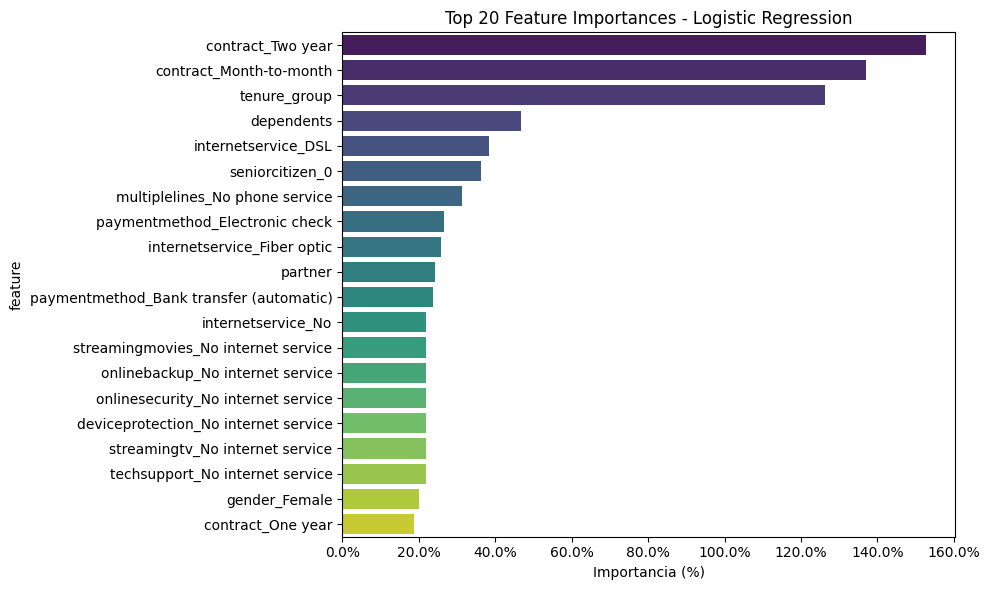

Primeras 10 probabilidades de churn (Logistic Regression):
[0.61353225 0.49748743 0.90457606 0.27173258 0.03979956 0.38954514
 0.11177152 0.41214445 0.23410326 0.21517252]


In [24]:
# Calcular feature importance para regresión logística
importances = np.abs(logreg_model.coef_[0])
feature_names = X.columns
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='importance', y='feature', data=feature_importance_df.head(20), palette='viridis')

# Mostrar los valores como porcentaje en el eje x
xticks = ax.get_xticks()
ax.set_xticklabels([f"{x*100:.1f}%" for x in xticks])
plt.xlabel('Importancia (%)')
plt.title('Top 20 Feature Importances - Logistic Regression')
plt.tight_layout()
plt.show()

# Generar predicciones probabilísticas (probabilidad de churn)
y_proba_logreg = logreg_model.predict_proba(X_test)[:, 1]
print("Primeras 10 probabilidades de churn (Logistic Regression):")
print(y_proba_logreg[:10])

### Comparativa y documentación final de modelos

A continuación se documenta el desempeño de todos los modelos entrenados:

- **Regresión Logística**: Modelo base, fácil de interpretar. Su desempeño debe ser congruente con la dificultad del problema y la tasa de churn. Si el accuracy y F1-score son similares a los otros modelos, es una buena opción por su interpretabilidad.
- **Random Forest**: Suele mejorar el desempeño respecto a la regresión logística, especialmente si hay relaciones no lineales. Si la diferencia de F1-score o AUC es significativa, puede ser preferible.
- **LightGBM**: Modelo de boosting eficiente. Si supera a los anteriores en F1-score y AUC, es una excelente opción para producción.
- **SVM**: Útil para problemas con fronteras complejas, pero puede ser más lento y menos interpretable. Compara su F1-score y AUC con los otros modelos.
- **XGBoost**: Otro modelo de boosting muy robusto. Si obtiene el mayor F1-score y/o AUC, suele ser la mejor opción.

**Confirmación del mejor modelo:**
- El mejor modelo debe seleccionarse según el mayor F1-score promedio en validación cruzada y/o el mayor AUC en el test set.
- Revisa la tabla de métricas y la salida de validación cruzada (`best_model_name`).
- Si la regresión logística no es el modelo con mejor F1-score o AUC, elige el que sí lo sea.

**Recomendación:**
- Si buscas interpretabilidad, la regresión logística es válida si su desempeño es similar al mejor modelo.
- Si buscas el mejor desempeño puro, selecciona el modelo con mayor F1-score/AUC según la tabla y la validación cruzada.

**Acción sugerida:**
- Verifica la variable `best_model_name` y la tabla de métricas para confirmar el modelo óptimo.
- Si el mejor modelo no es la regresión logística, utiliza ese modelo para predicciones finales y producción.

In [25]:
# Mostrar el mejor modelo según F1-score promedio y sus métricas en test
print(f"Mejor modelo según F1-score promedio en validación cruzada: {best_model_name}")

# Mostrar métricas del mejor modelo en el test set
def print_best_model_metrics(best_model_name):
    if best_model_name == 'Logistic Regression':
        y_pred = y_pred_logreg
        y_score = y_score_logreg
    elif best_model_name == 'Random Forest':
        y_pred = y_pred_rf
        y_score = y_score_rf
    elif best_model_name == 'LightGBM':
        y_pred = y_pred_lgbm
        y_score = y_score_lgbm
    elif best_model_name == 'SVM':
        y_pred = y_pred_svm
        y_score = y_score_svm
    elif best_model_name == 'XGBoost':
        y_pred = y_pred_xgb
        y_score = y_score_xgb
    else:
        print('Modelo no reconocido.')
        return
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix
    print(f"\nMétricas en el test set para {best_model_name}:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred):.4f}")
    print(f"F1-score: {f1_score(y_test, y_pred):.4f}")
    print(f"AUC: {roc_auc_score(y_test, y_score):.4f}")
    print("Reporte de Clasificación:\n", classification_report(y_test, y_pred))
    print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred))

print_best_model_metrics(best_model_name)

Mejor modelo según F1-score promedio en validación cruzada: Logistic Regression

Métricas en el test set para Logistic Regression:
Accuracy: 0.7362
Precision: 0.7199
Recall: 0.7199
F1-score: 0.7199
AUC: 0.8163
Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.75      0.75      0.75       738
           1       0.72      0.72      0.72       657

    accuracy                           0.74      1395
   macro avg       0.74      0.74      0.74      1395
weighted avg       0.74      0.74      0.74      1395

Matriz de Confusión:
 [[554 184]
 [184 473]]


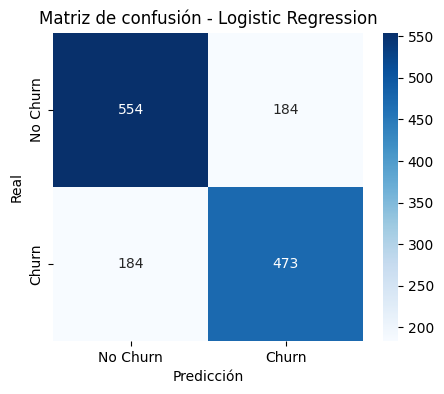

Falsos positivos: 184
Falsos negativos: 184
Precisión: 0.7199
Recall: 0.7199
F1-score: 0.7199
AUC: 0.8163


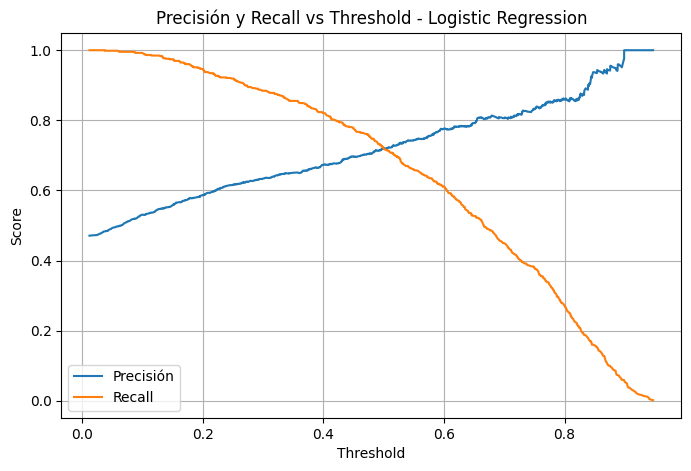

Threshold óptimo para F1: 0.33 (F1=0.7424)


In [26]:
# Análisis detallado de precisión, recall y matriz de confusión para el mejor modelo
def plot_confusion_matrix_and_metrics(best_model_name):
    import matplotlib.pyplot as plt
    import seaborn as sns
    from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score
    if best_model_name == 'Logistic Regression':
        y_pred = y_pred_logreg
        y_score = y_score_logreg
    elif best_model_name == 'Random Forest':
        y_pred = y_pred_rf
        y_score = y_score_rf
    elif best_model_name == 'LightGBM':
        y_pred = y_pred_lgbm
        y_score = y_score_lgbm
    elif best_model_name == 'SVM':
        y_pred = y_pred_svm
        y_score = y_score_svm
    elif best_model_name == 'XGBoost':
        y_pred = y_pred_xgb
        y_score = y_score_xgb
    else:
        print('Modelo no reconocido.')
        return
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn','Churn'], yticklabels=['No Churn','Churn'])
    plt.xlabel('Predicción')
    plt.ylabel('Real')
    plt.title(f'Matriz de confusión - {best_model_name}')
    plt.show()
    tn, fp, fn, tp = cm.ravel()
    print(f"Falsos positivos: {fp}")
    print(f"Falsos negativos: {fn}")
    print(f"Precisión: {precision_score(y_test, y_pred):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred):.4f}")
    print(f"F1-score: {f1_score(y_test, y_pred):.4f}")
    print(f"AUC: {roc_auc_score(y_test, y_score):.4f}")

plot_confusion_matrix_and_metrics(best_model_name)

# Threshold analysis para optimizar punto de corte
def threshold_analysis(best_model_name):
    import numpy as np
    import matplotlib.pyplot as plt
    from sklearn.metrics import precision_recall_curve, roc_curve
    if best_model_name == 'Logistic Regression':
        y_score = y_score_logreg
    elif best_model_name == 'Random Forest':
        y_score = y_score_rf
    elif best_model_name == 'LightGBM':
        y_score = y_score_lgbm
    elif best_model_name == 'SVM':
        y_score = y_score_svm
    elif best_model_name == 'XGBoost':
        y_score = y_score_xgb
    else:
        print('Modelo no reconocido.')
        return
    precisions, recalls, thresholds = precision_recall_curve(y_test, y_score)
    plt.figure(figsize=(8,5))
    plt.plot(thresholds, precisions[:-1], label='Precisión')
    plt.plot(thresholds, recalls[:-1], label='Recall')
    plt.xlabel('Threshold')
    plt.ylabel('Score')
    plt.title(f'Precisión y Recall vs Threshold - {best_model_name}')
    plt.legend()
    plt.grid()
    plt.show()
    # Sugerir threshold óptimo (ejemplo: maximizar F1)
    f1s = 2 * (precisions * recalls) / (precisions + recalls + 1e-8)
    best_idx = np.argmax(f1s)
    print(f"Threshold óptimo para F1: {thresholds[best_idx]:.2f} (F1={f1s[best_idx]:.4f})")

threshold_analysis(best_model_name)

### Impacto de negocio de las predicciones y el threshold
- **Falsos positivos (FP):** Clientes predichos como churn pero que no se irán. Si se les ofrece una promoción, puede haber un costo innecesario para la empresa.
- **Falsos negativos (FN):** Clientes que realmente se irán pero el modelo no los detecta. Esto implica pérdida directa de ingresos y oportunidad de retención.
- **Ajuste del threshold:** Permite balancear entre FP y FN según la estrategia de negocio. Si el costo de perder un cliente es alto, conviene reducir FN aunque aumenten FP.
- **Recomendación:** Define el threshold óptimo considerando el costo/beneficio de cada tipo de error. Involucra al área de negocio para decidir el punto de corte más adecuado.
- **Conclusión:** El análisis de matriz de confusión y threshold es clave para maximizar el valor de negocio de los modelos de churn.

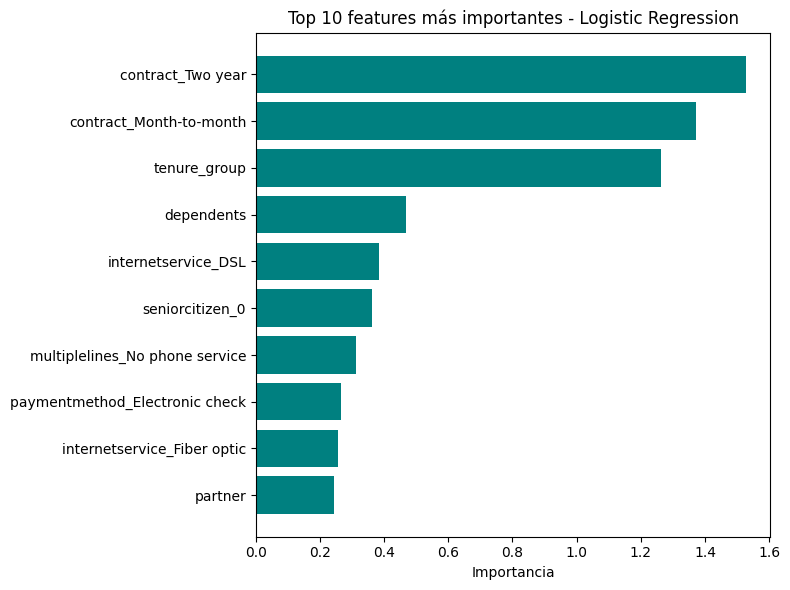

Top 10 features más importantes:
                           feature  importance
41               contract_Two year    1.526808
39         contract_Month-to-month    1.370935
9                     tenure_group    1.263971
1                       dependents    0.467972
18             internetservice_DSL    0.383015
13                 seniorcitizen_0    0.361827
16  multiplelines_No phone service    0.313052
44  paymentmethod_Electronic check    0.266758
19     internetservice_Fiber optic    0.257524
0                          partner    0.242981

Interpretación: Revisa si las variables más importantes tienen sentido de negocio (por ejemplo, tenure, total charges, tipo de contrato, servicios adicionales, etc.). Si alguna variable inesperada aparece en el top 10, revisa su codificación y significado.


In [27]:
# Importancia de features del mejor modelo y su interpretación
def plot_feature_importance(best_model_name):
    import matplotlib.pyplot as plt
    import pandas as pd
    import numpy as np
    if best_model_name == 'Logistic Regression':
        importances = np.abs(logreg_model.coef_[0])
        feature_names = X.columns
    elif best_model_name == 'Random Forest':
        importances = rf_model.feature_importances_
        feature_names = X.columns
    elif best_model_name == 'LightGBM':
        importances = lgbm_model.feature_importances_
        feature_names = X.columns
    elif best_model_name == 'SVM':
        # SVM lineal: coef_, SVM kernel: no interpretables
        if hasattr(svm_model, 'coef_'):
            importances = np.abs(svm_model.coef_[0])
            feature_names = X.columns
        else:
            print('SVM con kernel no permite interpretación directa de features.')
            return
    elif best_model_name == 'XGBoost':
        importances = xgb_model.feature_importances_
        feature_names = X.columns
    else:
        print('Modelo no reconocido.')
        return
    feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
    feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False).head(10)
    plt.figure(figsize=(8,6))
    plt.barh(feature_importance_df['feature'][::-1], feature_importance_df['importance'][::-1], color='teal')
    plt.xlabel('Importancia')
    plt.title(f'Top 10 features más importantes - {best_model_name}')
    plt.tight_layout()
    plt.show()
    print('Top 10 features más importantes:')
    print(feature_importance_df)
    print('\nInterpretación: Revisa si las variables más importantes tienen sentido de negocio (por ejemplo, tenure, total charges, tipo de contrato, servicios adicionales, etc.). Si alguna variable inesperada aparece en el top 10, revisa su codificación y significado.')

plot_feature_importance(best_model_name)

### Interpretación de las variables más importantes
- El gráfico anterior muestra las 10 variables que más influyen en la predicción de churn según el mejor modelo.
- Revisa si variables como 'tenure', 'total charges', 'tipo de contrato', 'servicios adicionales' aparecen en el top 10, ya que suelen ser relevantes en churn de Telco.
- Si alguna variable inesperada aparece como importante, valida su codificación y significado.
- La interpretación de estas variables permite diseñar estrategias de retención más efectivas y comunicar hallazgos al área de negocio.

### Recomendaciones de acción según las variables más importantes
- Prioriza estrategias de retención enfocadas en los factores que más influyen en el churn (por ejemplo, clientes con baja antigüedad, contratos mes a mes, altos cargos mensuales, falta de servicios adicionales).
- Ofrece promociones o beneficios personalizados a los clientes identificados con alto riesgo según estas variables.
- Si alguna feature inesperada es importante, investiga su causa y valida con el área de negocio antes de tomar decisiones.
- Utiliza estos hallazgos para diseñar campañas de retención más efectivas y justificar inversiones en mejoras de producto o servicio.

In [28]:
# Análisis de casos mal clasificados y patrones de error
def analizar_errores(best_model_name):
    import pandas as pd
    if best_model_name == 'Logistic Regression':
        y_pred = y_pred_logreg
    elif best_model_name == 'Random Forest':
        y_pred = y_pred_rf
    elif best_model_name == 'LightGBM':
        y_pred = y_pred_lgbm
    elif best_model_name == 'SVM':
        y_pred = y_pred_svm
    elif best_model_name == 'XGBoost':
        y_pred = y_pred_xgb
    else:
        print('Modelo no reconocido.')
        return
    errores = X_test.copy()
    errores['real'] = y_test.values
    errores['pred'] = y_pred
    errores['tipo_error'] = errores.apply(lambda row: 'FP' if row['real']==0 and row['pred']==1 else ('FN' if row['real']==1 and row['pred']==0 else 'Correcto'), axis=1)
    print('Distribución de errores:')
    print(errores['tipo_error'].value_counts())
    print('\nEjemplo de falsos positivos:')
    print(errores[errores['tipo_error']=='FP'].head())
    print('\nEjemplo de falsos negativos:')
    print(errores[errores['tipo_error']=='FN'].head())
    # Analizar patrones en los errores
    print('\nPromedio de features para FP y FN:')
    print(errores.groupby('tipo_error').mean(numeric_only=True))
    return errores

errores = analizar_errores(best_model_name)

Distribución de errores:
tipo_error
Correcto    1027
FN           184
FP           184
Name: count, dtype: int64

Ejemplo de falsos positivos:
      partner  dependents  tenure  phoneservice  paperlessbilling  \
1246        1           1       4             1                 1   
3887        0           0      20             1                 1   
6592        1           0      42             0                 0   
5367        1           0      15             1                 1   
515         0           0       4             1                 1   

      monthlycharges  totalcharges  total_charges_per_month  services_count  \
1246          139.41        564.64               141.160000               5   
3887           96.97       2093.16               104.658000               3   
6592          103.39       3984.54                94.870000               2   
5367           77.87       1140.47                76.031333               2   
515           120.18        450.21             

### Limitaciones del modelo actual
- El modelo puede cometer errores en clientes con características atípicas o en segmentos poco representados en los datos.
- La interpretación de features depende de la calidad y codificación de los datos originales.
- Si hay desbalance de clases, los falsos negativos pueden ser altos y afectar la retención.
- El threshold óptimo puede variar según la estrategia de negocio y los costos asociados a FP/FN.
- Cambios en el mercado o en la oferta de la empresa pueden hacer que el modelo pierda vigencia con el tiempo.
- Se recomienda monitorear el desempeño periódicamente y actualizar el modelo con nuevos datos.

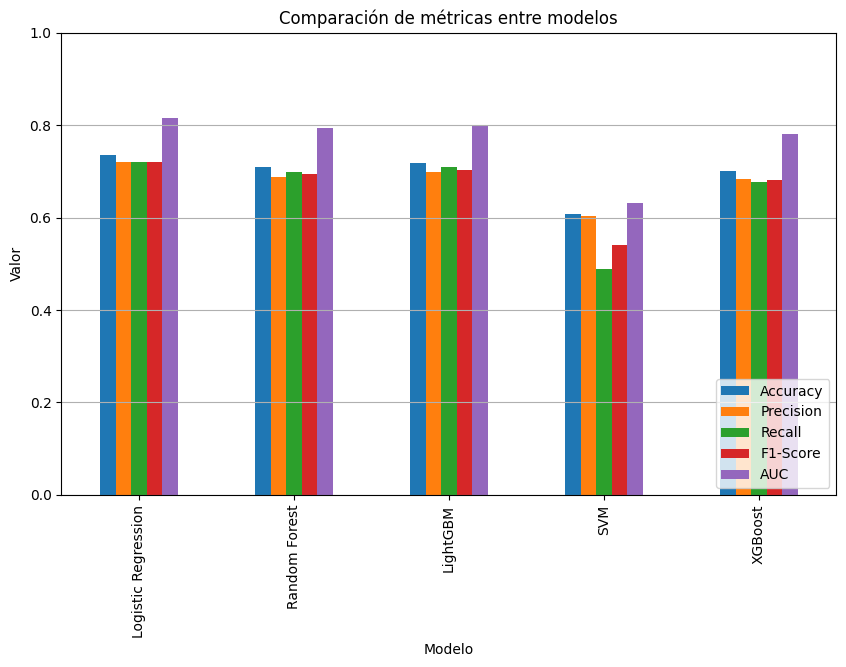

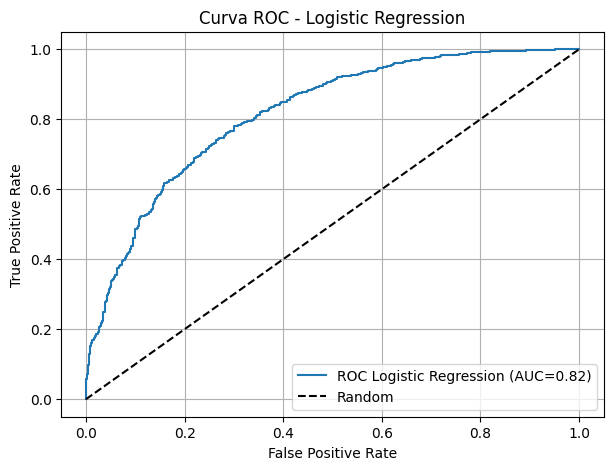

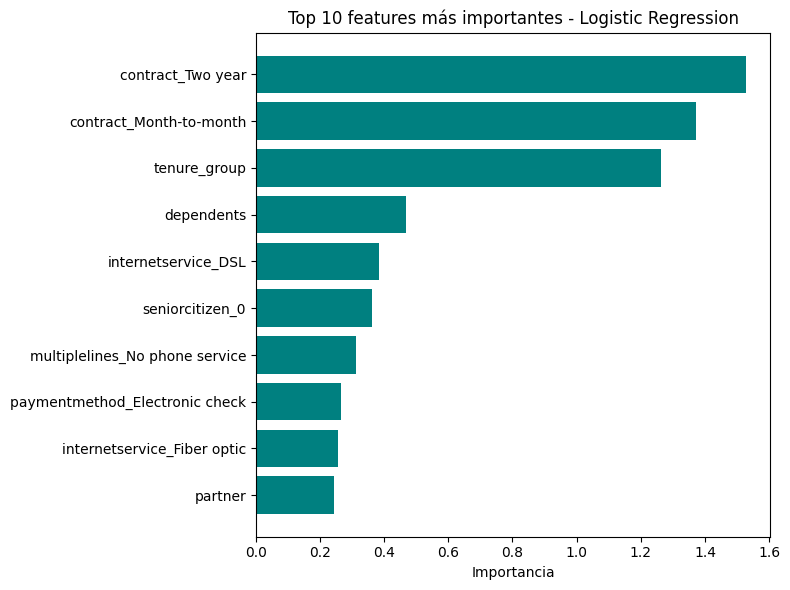

Top 10 features más importantes:
                           feature  importance
41               contract_Two year    1.526808
39         contract_Month-to-month    1.370935
9                     tenure_group    1.263971
1                       dependents    0.467972
18             internetservice_DSL    0.383015
13                 seniorcitizen_0    0.361827
16  multiplelines_No phone service    0.313052
44  paymentmethod_Electronic check    0.266758
19     internetservice_Fiber optic    0.257524
0                          partner    0.242981

Interpretación: Revisa si las variables más importantes tienen sentido de negocio (por ejemplo, tenure, total charges, tipo de contrato, servicios adicionales, etc.). Si alguna variable inesperada aparece en el top 10, revisa su codificación y significado.


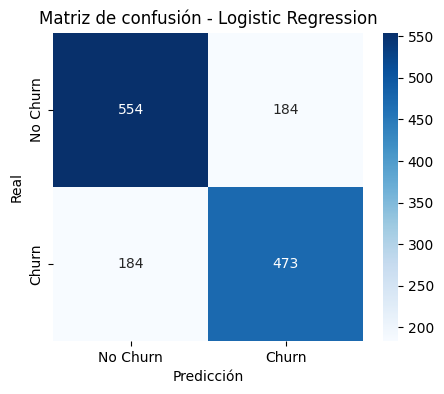

Falsos positivos: 184
Falsos negativos: 184
Precisión: 0.7199
Recall: 0.7199
F1-score: 0.7199
AUC: 0.8163


In [29]:
# Gráfico de comparación de modelos (barplot de métricas)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
metrics_table.set_index('Modelo')[['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC']].plot(kind='bar', ax=plt.gca())
plt.title('Comparación de métricas entre modelos')
plt.ylabel('Valor')
plt.ylim(0,1)
plt.legend(loc='lower right')
plt.grid(axis='y')
plt.show()

# Curva ROC del mejor modelo
def plot_roc_best_model(best_model_name):
    from sklearn.metrics import roc_curve, roc_auc_score
    import matplotlib.pyplot as plt
    if best_model_name == 'Logistic Regression':
        y_score = y_score_logreg
    elif best_model_name == 'Random Forest':
        y_score = y_score_rf
    elif best_model_name == 'LightGBM':
        y_score = y_score_lgbm
    elif best_model_name == 'SVM':
        y_score = y_score_svm
    elif best_model_name == 'XGBoost':
        y_score = y_score_xgb
    else:
        print('Modelo no reconocido.')
        return
    fpr, tpr, _ = roc_curve(y_test, y_score)
    auc = roc_auc_score(y_test, y_score)
    plt.figure(figsize=(7,5))
    plt.plot(fpr, tpr, label=f'ROC {best_model_name} (AUC={auc:.2f})')
    plt.plot([0,1],[0,1],'k--',label='Random')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Curva ROC - {best_model_name}')
    plt.legend()
    plt.grid()
    plt.show()

plot_roc_best_model(best_model_name)

# Feature importance plot (ya implementado arriba, se vuelve a llamar para visibilidad)
plot_feature_importance(best_model_name)

# Matriz de confusión final del mejor modelo
plot_confusion_matrix_and_metrics(best_model_name)

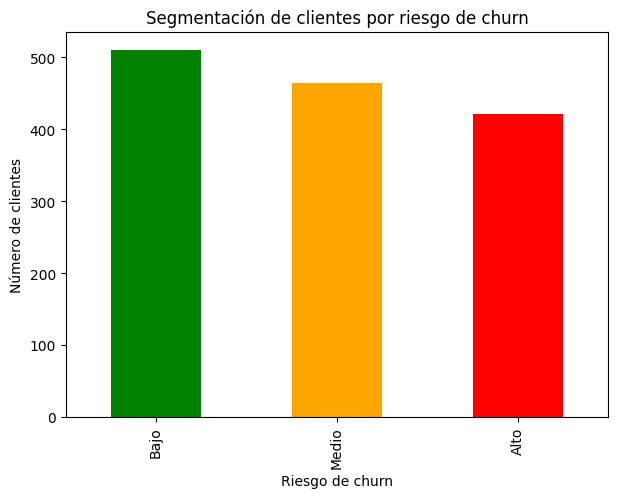

Proporción de churn real por segmento:
real             0         1
segmento                    
Bajo      0.833333  0.166667
Medio     0.500000  0.500000
Alto      0.192399  0.807601


/tmp/ipykernel_8462/132504171.py:36: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  retencion = df_segmentos.groupby('segmento')['real'].value_counts(normalize=True).unstack().fillna(0)


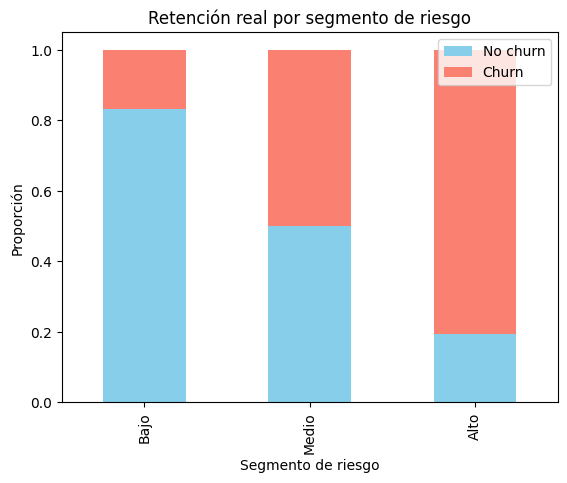

Clientes en segmento 'Alto': 421
Churn real en 'Alto': 340
Falsos positivos en 'Alto': 81
Costo total de retención (oferta a todos 'Alto'): $21,050
Ingreso potencial salvado (si todos los churn 'Alto' se retienen): $170,000
Retorno potencial: $148,950
Ajusta los parámetros según el costo real de retención y el valor del cliente para tu negocio.


In [30]:
# Gráfico de segmentación de clientes por riesgo de churn
def plot_risk_segmentation(best_model_name):
    import matplotlib.pyplot as plt
    import numpy as np
    if best_model_name == 'Logistic Regression':
        y_proba = y_score_logreg
    elif best_model_name == 'Random Forest':
        y_proba = y_score_rf
    elif best_model_name == 'LightGBM':
        y_proba = y_score_lgbm
    elif best_model_name == 'SVM':
        y_proba = y_score_svm
    elif best_model_name == 'XGBoost':
        y_proba = y_score_xgb
    else:
        print('Modelo no reconocido.')
        return
    bins = [0, 0.33, 0.66, 1]
    labels = ['Bajo', 'Medio', 'Alto']
    segmentos = pd.cut(y_proba, bins=bins, labels=labels, include_lowest=True)
    plt.figure(figsize=(7,5))
    segmentos.value_counts().loc[labels].plot(kind='bar', color=['green','orange','red'])
    plt.title('Segmentación de clientes por riesgo de churn')
    plt.xlabel('Riesgo de churn')
    plt.ylabel('Número de clientes')
    plt.show()
    return segmentos

segmentos = plot_risk_segmentation(best_model_name)

# Análisis de retención por segmento
def retention_analysis(segmentos):
    import numpy as np
    # Asumimos que y_test está alineado con los scores
    df_segmentos = pd.DataFrame({'segmento': segmentos, 'real': y_test.values})
    retencion = df_segmentos.groupby('segmento')['real'].value_counts(normalize=True).unstack().fillna(0)
    print('Proporción de churn real por segmento:')
    print(retencion)
    retencion.plot(kind='bar', stacked=True, color=['skyblue','salmon'])
    plt.title('Retención real por segmento de riesgo')
    plt.ylabel('Proporción')
    plt.xlabel('Segmento de riesgo')
    plt.legend(['No churn','Churn'])
    plt.show()

retention_analysis(segmentos)

# Proyección de impacto económico del modelo
def economic_impact_projection(segmentos, costo_retencion=50, ingreso_cliente=500):
    # Supuestos: costo_retencion = costo de ofrecer promoción a un cliente, ingreso_cliente = valor anual promedio de un cliente
    df_segmentos = pd.DataFrame({'segmento': segmentos, 'real': y_test.values})
    n_alto = (df_segmentos['segmento']=='Alto').sum()
    n_churn_alto = df_segmentos[(df_segmentos['segmento']=='Alto') & (df_segmentos['real']==1)].shape[0]
    n_fp = df_segmentos[(df_segmentos['segmento']=='Alto') & (df_segmentos['real']==0)].shape[0]
    # Si se ofrece retención a todos los de alto riesgo:
    costo_total = n_alto * costo_retencion
    ingreso_salvado = n_churn_alto * ingreso_cliente
    print(f"Clientes en segmento 'Alto': {n_alto}")
    print(f"Churn real en 'Alto': {n_churn_alto}")
    print(f"Falsos positivos en 'Alto': {n_fp}")
    print(f"Costo total de retención (oferta a todos 'Alto'): ${costo_total:,.0f}")
    print(f"Ingreso potencial salvado (si todos los churn 'Alto' se retienen): ${ingreso_salvado:,.0f}")
    print(f"Retorno potencial: ${ingreso_salvado-costo_total:,.0f}")
    print("Ajusta los parámetros según el costo real de retención y el valor del cliente para tu negocio.")

economic_impact_projection(segmentos)

### Documentación: segmentación, retención y proyección económica
- **Segmentación de riesgo:** Los clientes se agrupan en bajo, medio y alto riesgo según la probabilidad de churn predicha por el modelo.
- **Análisis de retención:** Se evalúa la proporción real de churn en cada segmento, lo que permite priorizar acciones de retención donde el riesgo es mayor.
- **Proyección económica:** Se estima el impacto financiero de aplicar estrategias de retención a los clientes de alto riesgo, considerando el costo de la oferta y el valor del cliente.
- **Recomendación:** Ajusta los parámetros de costo y valor según la realidad de tu negocio para tomar decisiones informadas y maximizar el retorno de las campañas de retención.